In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load the text file into a df_qskframe
df_qsk = pd.read_csv('../build/benchmark_results.txt', header=0)

# rename columns
df_qsk.columns = ['filename', 'GPU_Time', 'CPU_Time']

df_qsk['qubits'] = df_qsk['filename'].str.extract(r'_(\d+)_').astype(int)
df_qsk['depth'] = df_qsk['filename'].str.extract(r'_(\d+).qasm').astype(int)

data_folder = "../data"

# Connect to the database
conn = sqlite3.connect(f'{data_folder}/db_ours.sqlite')

# Load table into pandas dataframe
df_ref = pd.read_sql_query("SELECT * FROM programs", conn)

# Close the connection
conn.close()

# read files from csv file
df_val = pd.read_csv('../build/times.csv', header=None)

# assign column names
df_val.columns = ['time', 'id']

# merge the two dataframes
df = pd.merge(df_val, df_ref, on='id')

df = pd.merge(df, df_qsk, on='filename')

# the filename is circuit_{qubits}_{depths}.qasm, so we can extract the number of qubits and depths and create new columns
df['qubits'] = df['filename'].str.extract(r'_(\d+)_').astype(int)
df['depth'] = df['filename'].str.extract(r'_(\d+).qasm').astype(int)

df.drop(columns=['filename', 'text'], inplace=True)

# sum tree_building_time_us to both contraction_cpu_time_us and time and drop column
df['contraction_cpu_time_us'] += df['tree_building_time_us'] / 1000 
df.drop(columns=['tree_building_time_us'], inplace=True)

# move all times to ms
df['contraction_cpu_time_us'] /= 1000
df['GPU_Time'] *= 1000
df['CPU_Time'] *= 1000

# rename columns contractions_cpu_time_us -> rust_time_cpu | time -> gpu_time | GPU_TIME -> qiskit_time_gpu | CPU_TIME -> qiskit_time_cpu
df.rename(columns={'contraction_cpu_time_us': 'rust_time_cpu', 'time': 'gpu_time', 'GPU_Time': 'qiskit_time_gpu', 'CPU_Time': 'qiskit_time_cpu'}, inplace=True)


In [5]:
qubit_set =  df['qubits'].unique()
qubit_set.sort()
qubit_set = qubit_set[::-1]

# choose 6 colors for the qubit numbers and stick to it
colors = { 
    5 : 'tab:olive',
    6 : 'tab:blue', 
    7 : 'tab:orange',
    8 : 'tab:green',
    9 : 'tab:red',
    10 : 'tab:purple'
}

In [6]:

# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set[2:]:
    df_qubit = df[df['qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], df_qubit['qiskit_time_cpu'] / df_qubit['rust_time_cpu'], label=f'{qubit} qubits', color=colors[qubit])

plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup Rust CPU vs Qiskit CPU')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig('../build/speedup_rust_cpu_vs_qiskit_cpu_lowq.svg', transparent=True, bbox_inches='tight')
plt.clf()

for qubit in qubit_set[:3]:
    df_qubit = df[df['qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], df_qubit['qiskit_time_cpu'] / df_qubit['rust_time_cpu'], label=f'{qubit} qubits', color=colors[qubit])

plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup Rust CPU vs Qiskit CPU')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig('../build/speedup_rust_cpu_vs_qiskit_cpu_highq.svg', transparent=True, bbox_inches='tight')
plt.clf()

<Figure size 640x480 with 0 Axes>

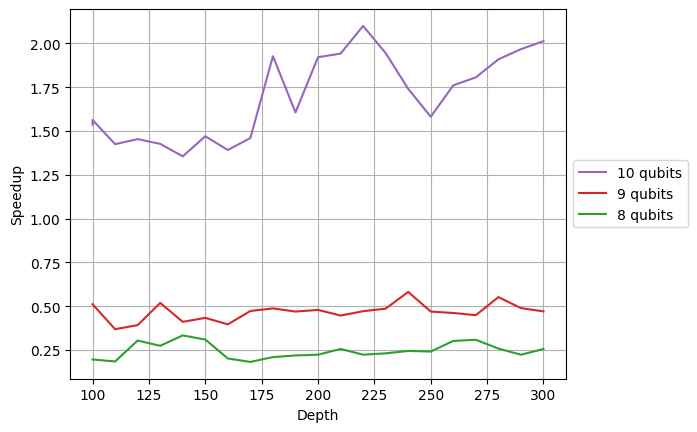

<Figure size 640x480 with 0 Axes>

In [11]:
# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set[2:]:
    df_qubit = df[df['qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], df_qubit['qiskit_time_gpu'] / df_qubit['gpu_time'], label=f'{qubit} qubits', color=colors[qubit])

plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup GPU (ours) vs GPU Qiskit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.show()
plt.savefig('../build/speedup_gpu_ours_vs_qiskit_lowq.svg', transparent=True, bbox_inches='tight')
plt.clf()

# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set[:3]:
    df_qubit = df[df['qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], df_qubit['gpu_time'] / df_qubit['qiskit_time_gpu'] , label=f'{qubit} qubits', color=colors[qubit])

plt.xlabel('Depth')
plt.ylabel('Speedup')
# plt.title('Speedup GPU (ours) vs GPU Qiskit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()
# plt.savefig('../build/speedup_gpu_ours_vs_qiskit_highq.svg', transparent=True, bbox_inches='tight')
plt.clf()

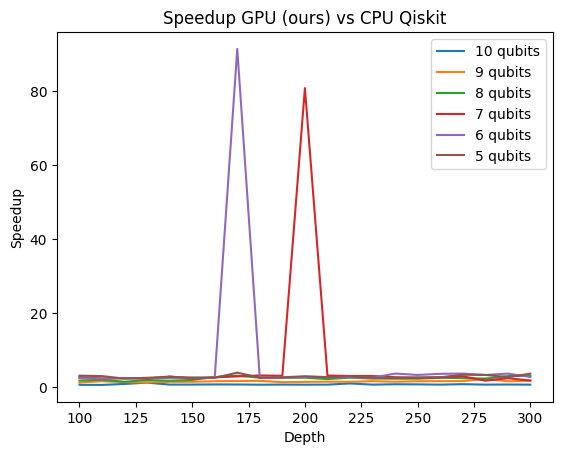

In [8]:
# for each qubit plot the speedup cpu_rust vs qiskit_cpu in function of the depth
for qubit in qubit_set:
    df_qubit = df[df['qubits'] == qubit]
    df_qubit = df_qubit.sort_values(by='depth')

    plt.plot(df_qubit['depth'], df_qubit['qiskit_time_cpu'] / df_qubit['gpu_time'], label=f'{qubit} qubits')

plt.xlabel('Depth')
plt.ylabel('Speedup')
plt.title('Speedup GPU (ours) vs CPU Qiskit')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.show()